<a href="https://colab.research.google.com/github/a-edel/Data-Science-with-Python-Homework/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

column_names = [
    "symboling", "normalized-losses", "make", "fuel-type", "aspiration",
    "num-of-doors", "body-style", "drive-wheels", "engine-location",
    "wheel-base", "length", "width", "height", "curb-weight",
    "engine-type", "num-of-cylinders", "engine-size", "fuel-system",
    "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm",
    "city-mpg", "highway-mpg", "price"
]
automobile_df = pd.read_csv("https://raw.githubusercontent.com/a-edel/Data-Science-with-Python-Homework/main/imports-85.data", names=column_names)
automobile_df.columns = automobile_df.columns.str.capitalize()

automobile_df['Horsepower'] = pd.to_numeric(automobile_df['Horsepower'], errors='coerce')
automobile_df.replace('?', np.nan, inplace=True)
automobile_df.dropna(inplace=True)

X = automobile_df[['Horsepower']]
Y = automobile_df['Highway-mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)
print(y_pred)

[31.88778775 20.51900132 28.21479521 33.11211859 29.26422165 33.46192741
 32.76230978 36.61020673 35.73568469 33.63683181 38.35925079 38.88396401
 36.61020673 36.43530232 35.21097147 30.83836131 28.21479521 34.16154503
 20.51900132 36.61020673 28.56460402 23.14256742 36.61020673 36.26039791
 31.01326572 28.91441284 20.51900132 33.11211859 36.61020673 20.16919251
 32.41250097 20.51900132]


In [ ]:
from sklearn.metrics import r2_score

print("r2_score: ", r2_score(y_test, y_pred))

r2_score:  0.6138533906458368


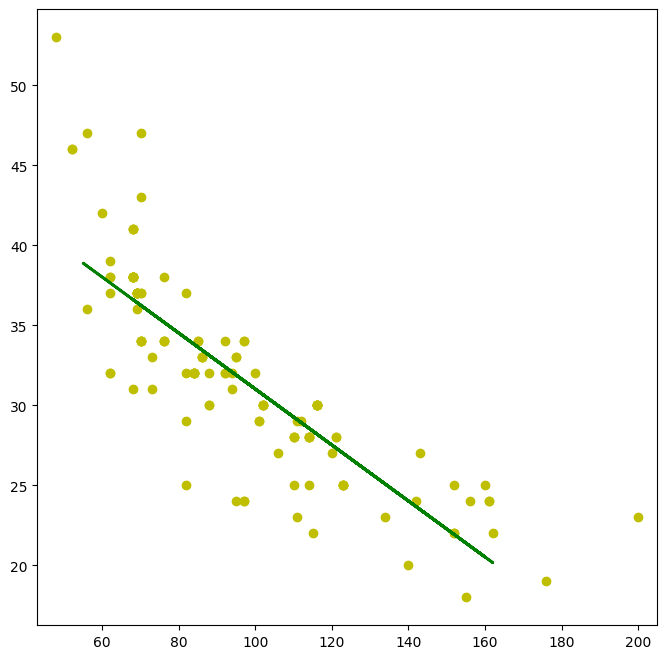

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

plt.plot(x_train_list, y_train_list, "o", c="y")
plt.xlim(min(x_train_list) - 5, max(x_train_list) + 5)

plt.plot(x_test, y_pred, linewidth=2, color ="g", linestyle="-", label="linear regression")

plt.show()


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

enc = KBinsDiscretizer(n_bins=20, encode='ordinal')

x_binned = enc.fit_transform(x_train)
x_binned[:10]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


array([[17.],
       [17.],
       [11.],
       [ 2.],
       [15.],
       [ 6.],
       [ 3.],
       [ 0.],
       [ 7.],
       [17.]])

In [ ]:
x_test_binned = enc.transform(x_test)

reg = LinearRegression().fit(x_binned, y_train)

y_pred = reg.predict(x_test_binned)

print(y_pred)

[30.94907221 22.84784261 25.88580371 31.96172591 28.92376481 32.97437961
 31.96172591 38.03764811 36.01234071 32.97437961 40.06295551 40.06295551
 38.03764811 37.02499441 34.99968701 29.93641851 25.88580371 33.98703331
 22.84784261 38.03764811 26.89845741 23.86049631 38.03764811 36.01234071
 29.93641851 27.91111111 22.84784261 31.96172591 38.03764811 22.84784261
 31.96172591 22.84784261]


In [ ]:
r2_score(y_test, y_pred)

0.7045851141742747

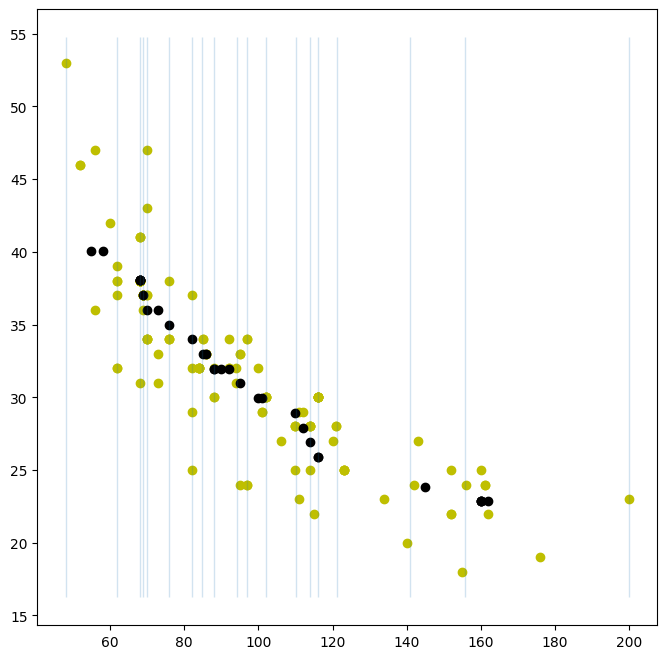

In [ ]:
plt.figure(figsize=(8, 8))

plt.scatter(x_train, y_train, c="y")
plt.scatter(x_test, y_pred, color="k")

plt.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)

plt.show()

In [ ]:
enc = KBinsDiscretizer(n_bins=20, encode="onehot")

x_binned = enc.fit_transform(x_train)

x_binned.toarray()[:10]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1.]])

In [ ]:
x_test_binned = enc.transform(x_test)

reg = LinearRegression().fit(x_binned, y_train)

y_pred = reg.predict(x_test_binned)

y_pred

array([29.99999733, 22.99999362, 29.30000238, 31.62498593, 28.44444634,
       33.4000091 , 31.62498593, 38.15384617, 36.4000017 , 33.4000091 ,
       45.00000111, 45.00000111, 38.15384617, 36.88888658, 34.99999863,
       29.42857119, 29.30000238, 31.44444485, 22.99999362, 38.15384617,
       26.50000329, 23.0000037 , 38.15384617, 36.4000017 , 29.42857119,
       27.00000094, 22.99999362, 31.62498593, 38.15384617, 22.99999362,
       31.62498593, 22.99999362])

In [ ]:
r2_score(y_test, y_pred)

0.8406435987660145